# **Authors:**  
📌 *Justin Chris Catingub*  
📌 *Juliana Marie Ochea*  
---

## **Data Analytics Assignment**

## **Horizontal Stacked Bar Chart**

In [ ]:
# Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
bar_file = "bar_assignment.csv"
bar_df = pd.read_csv(bar_file)

# Convert 1 -> "Yes", 0 -> "No"
bar_df["COUNT"] = bar_df["COUNT"].map({1: "Yes", 0: "No"})
bar_pivot = bar_df.pivot_table(index="LABEL", columns="COUNT", aggfunc=len, fill_value=0)

# Plot Bar Graph
plt.figure(figsize=(8, 6))
bar_pivot.plot(kind='barh', stacked=True, colormap='coolwarm', edgecolor='black')
plt.xlabel("Count")
plt.ylabel("Label")
plt.title("Horizontal Stacked Bar Chart")
plt.legend(title="Response")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

## **Sankey Diagram**

In [ ]:
import plotly.graph_objects as go

# Load Data
sankey_file = "sankey_assignment.csv"
sankey_df = pd.read_csv(sankey_file)

# Transform data to long format
sankey_data = pd.melt(
    sankey_df,
    id_vars=['LABEL'],
    var_name='origin',
    value_name='weight'
).rename(columns={'LABEL': 'destination'})[['origin', 'destination', 'weight']]

# Define network connections between layers
first_level_conn = sankey_data.iloc[0:40]
second_level_conn = sankey_data.iloc[40:][['destination', 'origin', 'weight']]
second_level_conn.columns = ['origin', 'destination', 'weight']

# Combine connection data
network_links = pd.concat([first_level_conn, second_level_conn], ignore_index=True)

# Create node index mapping
node_labels = pd.unique(network_links[['origin', 'destination']].to_numpy().flatten())
label_to_id = {label: idx for idx, label in enumerate(node_labels)}

# Convert labels to numeric indices
network_links['origin'] = network_links['origin'].apply(label_to_id.get)
network_links['destination'] = network_links['destination'].apply(label_to_id.get)

# Define color scheme
NODE_PALETTE = [
    '#FFA07A', '#20B2AA', '#FF8C00', '#FF6AB4', '#8FBC8F', 
    '#02CED1', '#FFD701', '#BA55D3', '#87CEFA', '#4782B4'
]
node_color_map = [NODE_PALETTE[i % len(NODE_PALETTE)] for i in range(len(node_labels))]

# Generate visualization
sankey_figure = go.Figure(go.Sankey(
    arrangement="fixed",
    node={'label': node_labels, 'color': node_color_map},
    link={
        'source': network_links['origin'],
        'target': network_links['destination'],
        'value': network_links['weight'],
        'color': [node_color_map[s] for s in network_links['origin']]
    }
))

# Configure layout settings
sankey_figure.update_layout(
    title={'text': "Sankey Diagram", 'x': 0.5},
    font={'family': 'Arial', 'size': 11, 'color': '#333'},
    height=600
)

# Display visualization
sankey_figure.show()

## **Network Graph**

In [ ]:
import networkx as nx
import numpy as np

# Load Data
network_file = "networks_assignment.csv"
network_df = pd.read_csv(network_file)

# Create Graph
G = nx.Graph()
primary_nodes = network_df["LABELS"].tolist()
primary_edges = [(primary_nodes[i], primary_nodes[(i + 1) % len(primary_nodes)]) for i in range(len(primary_nodes))]

secondary_nodes = {'BIH', 'GEO', 'ISR', 'MNE', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'AUS', 'HKG', 'USA'}
tertiary_nodes = {'AUT', 'BEL', 'BGR', 'HRV', 'CZE', 'EST', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LUX', 'NLD', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP'}

secondary_edges = [(row["LABELS"], node) for _, row in network_df.iterrows() for node in secondary_nodes if node in row and row[node] > 0]
tertiary_edges = [(row["LABELS"], node) for _, row in network_df.iterrows() for node in tertiary_nodes if node in row and row[node] > 0]

# Add nodes and edges
G.add_nodes_from(primary_nodes)
G.add_edges_from(primary_edges)
G.add_nodes_from(secondary_nodes)
G.add_edges_from(secondary_edges)
G.add_nodes_from(tertiary_nodes)
G.add_edges_from(tertiary_edges)

# Compute positions
primary_pos = nx.circular_layout(primary_nodes)
secondary_pos = {node: (np.cos(angle) * 2, np.sin(angle) * 2) for node, angle in zip(secondary_nodes, np.linspace(0, 2 * np.pi, len(secondary_nodes), endpoint=False))}
tertiary_pos = {node: (np.cos(angle) * 3, np.sin(angle) * 3) for node, angle in zip(tertiary_nodes, np.linspace(0, 2 * np.pi, len(tertiary_nodes), endpoint=False))}

# Merge positions
positions = {**primary_pos, **secondary_pos, **tertiary_pos}

# Plot Graph
plt.figure(figsize=(12, 10))
nx.draw_networkx_nodes(G, positions, nodelist=primary_nodes, node_color='blue', node_size=800, label='Primary Nodes')
nx.draw_networkx_edges(G, positions, edgelist=primary_edges, edge_color='blue', width=2)
nx.draw_networkx_nodes(G, positions, nodelist=secondary_nodes, node_color='green', node_size=600, label='Secondary Nodes')
nx.draw_networkx_edges(G, positions, edgelist=secondary_edges, edge_color='green', width=1.5, alpha=0.7)
nx.draw_networkx_nodes(G, positions, nodelist=tertiary_nodes, node_color='yellow', node_size=500, label='Tertiary Nodes')
nx.draw_networkx_edges(G, positions, edgelist=tertiary_edges, edge_color='yellow', width=1.2, alpha=0.7)
nx.draw_networkx_labels(G, positions, font_size=9, font_color='black', font_weight='bold')

plt.title("Network Graph", fontsize=14)
plt.axis('off')
plt.show()


<Figure size 800x600 with 0 Axes>

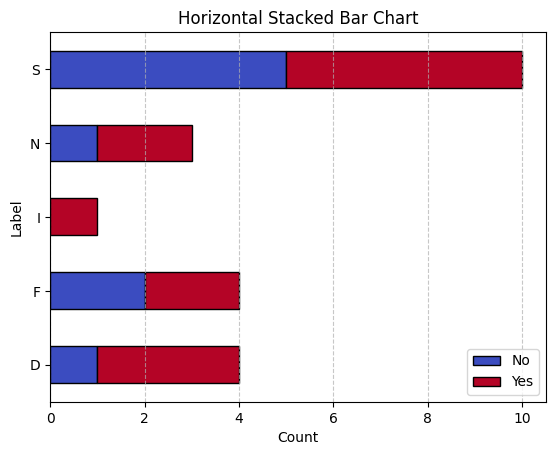

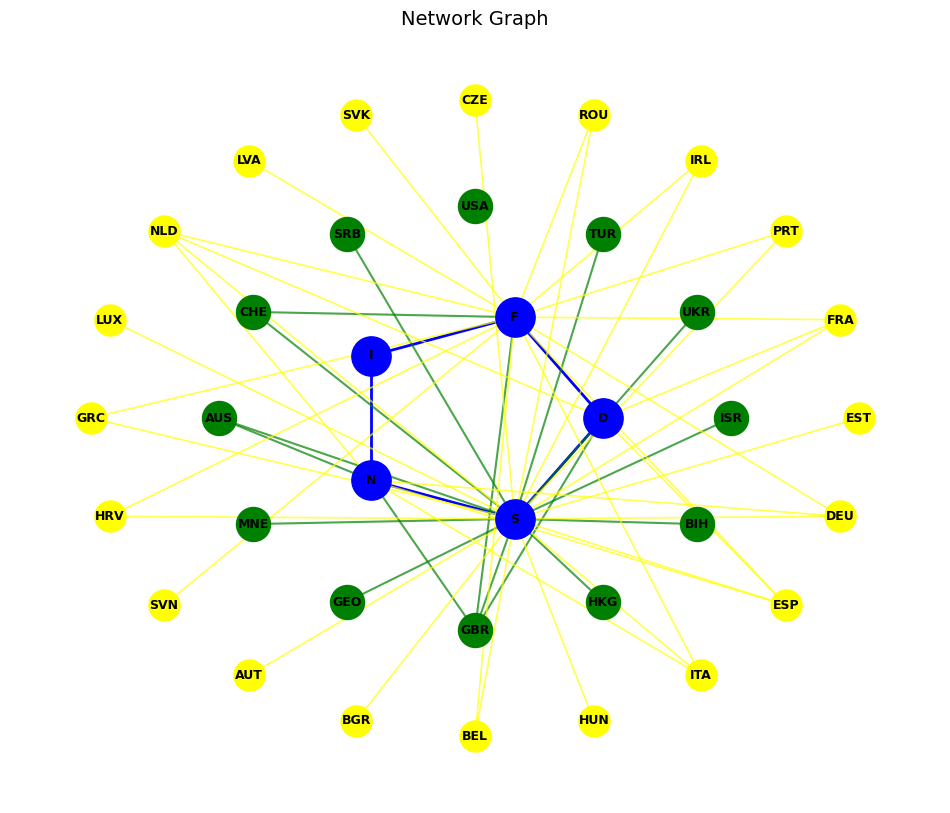

In [37]:
import os
print(os.listdir())


['.git', '.gitattributes', 'bar_assignment.csv', 'networks_assignment.csv', 'Plot.ipynb', 'sankey_assignment.csv']
